### Import the libraries

In [107]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D

### Get the data

In [108]:
# Get data from csv file
iris_file = pd.read_csv('./datasets/market.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[2:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

print('Features:',house_feature_names, '   Classes:', house_target_names)


Features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']    Classes: ['IXIC', 'NYA', 'GSPTSE', '000001.SS', 'HSI']


#### Build the model and evaluate it
Decision trees, Naive bayes and KNN

In [109]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1234)


# Data selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data, house_target, test_size=0.33, random_state=27)


# Train the model on the training set
clf_model = clf.fit(X_train, y_train)


# Make predictions on new data
# X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
# prediction = clf_model.predict(X_new)
# print("Prediction:", prediction)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))



Houldout test accuracy: 0.9882352941176471
CV Mean Accuracy: 0.976 (+/- 0.029)
Mean F1: 0.968 (+/- 0.040)
Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

   000001.SS      1.000     1.000     1.000        16
      GSPTSE      1.000     0.857     0.923         7
         HSI      0.950     1.000     0.974        19
        IXIC      1.000     1.000     1.000        35
         NYA      1.000     1.000     1.000         8

    accuracy                          0.988        85
   macro avg      0.990     0.971     0.979        85
weighted avg      0.989     0.988     0.988        85

[[16  0  0  0  0]
 [ 0  6  1  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0  8]]


Plot Tree with plot_tree

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['IXIC', 'NYA', 'GSPTSE', '000001.SS', 'HSI']


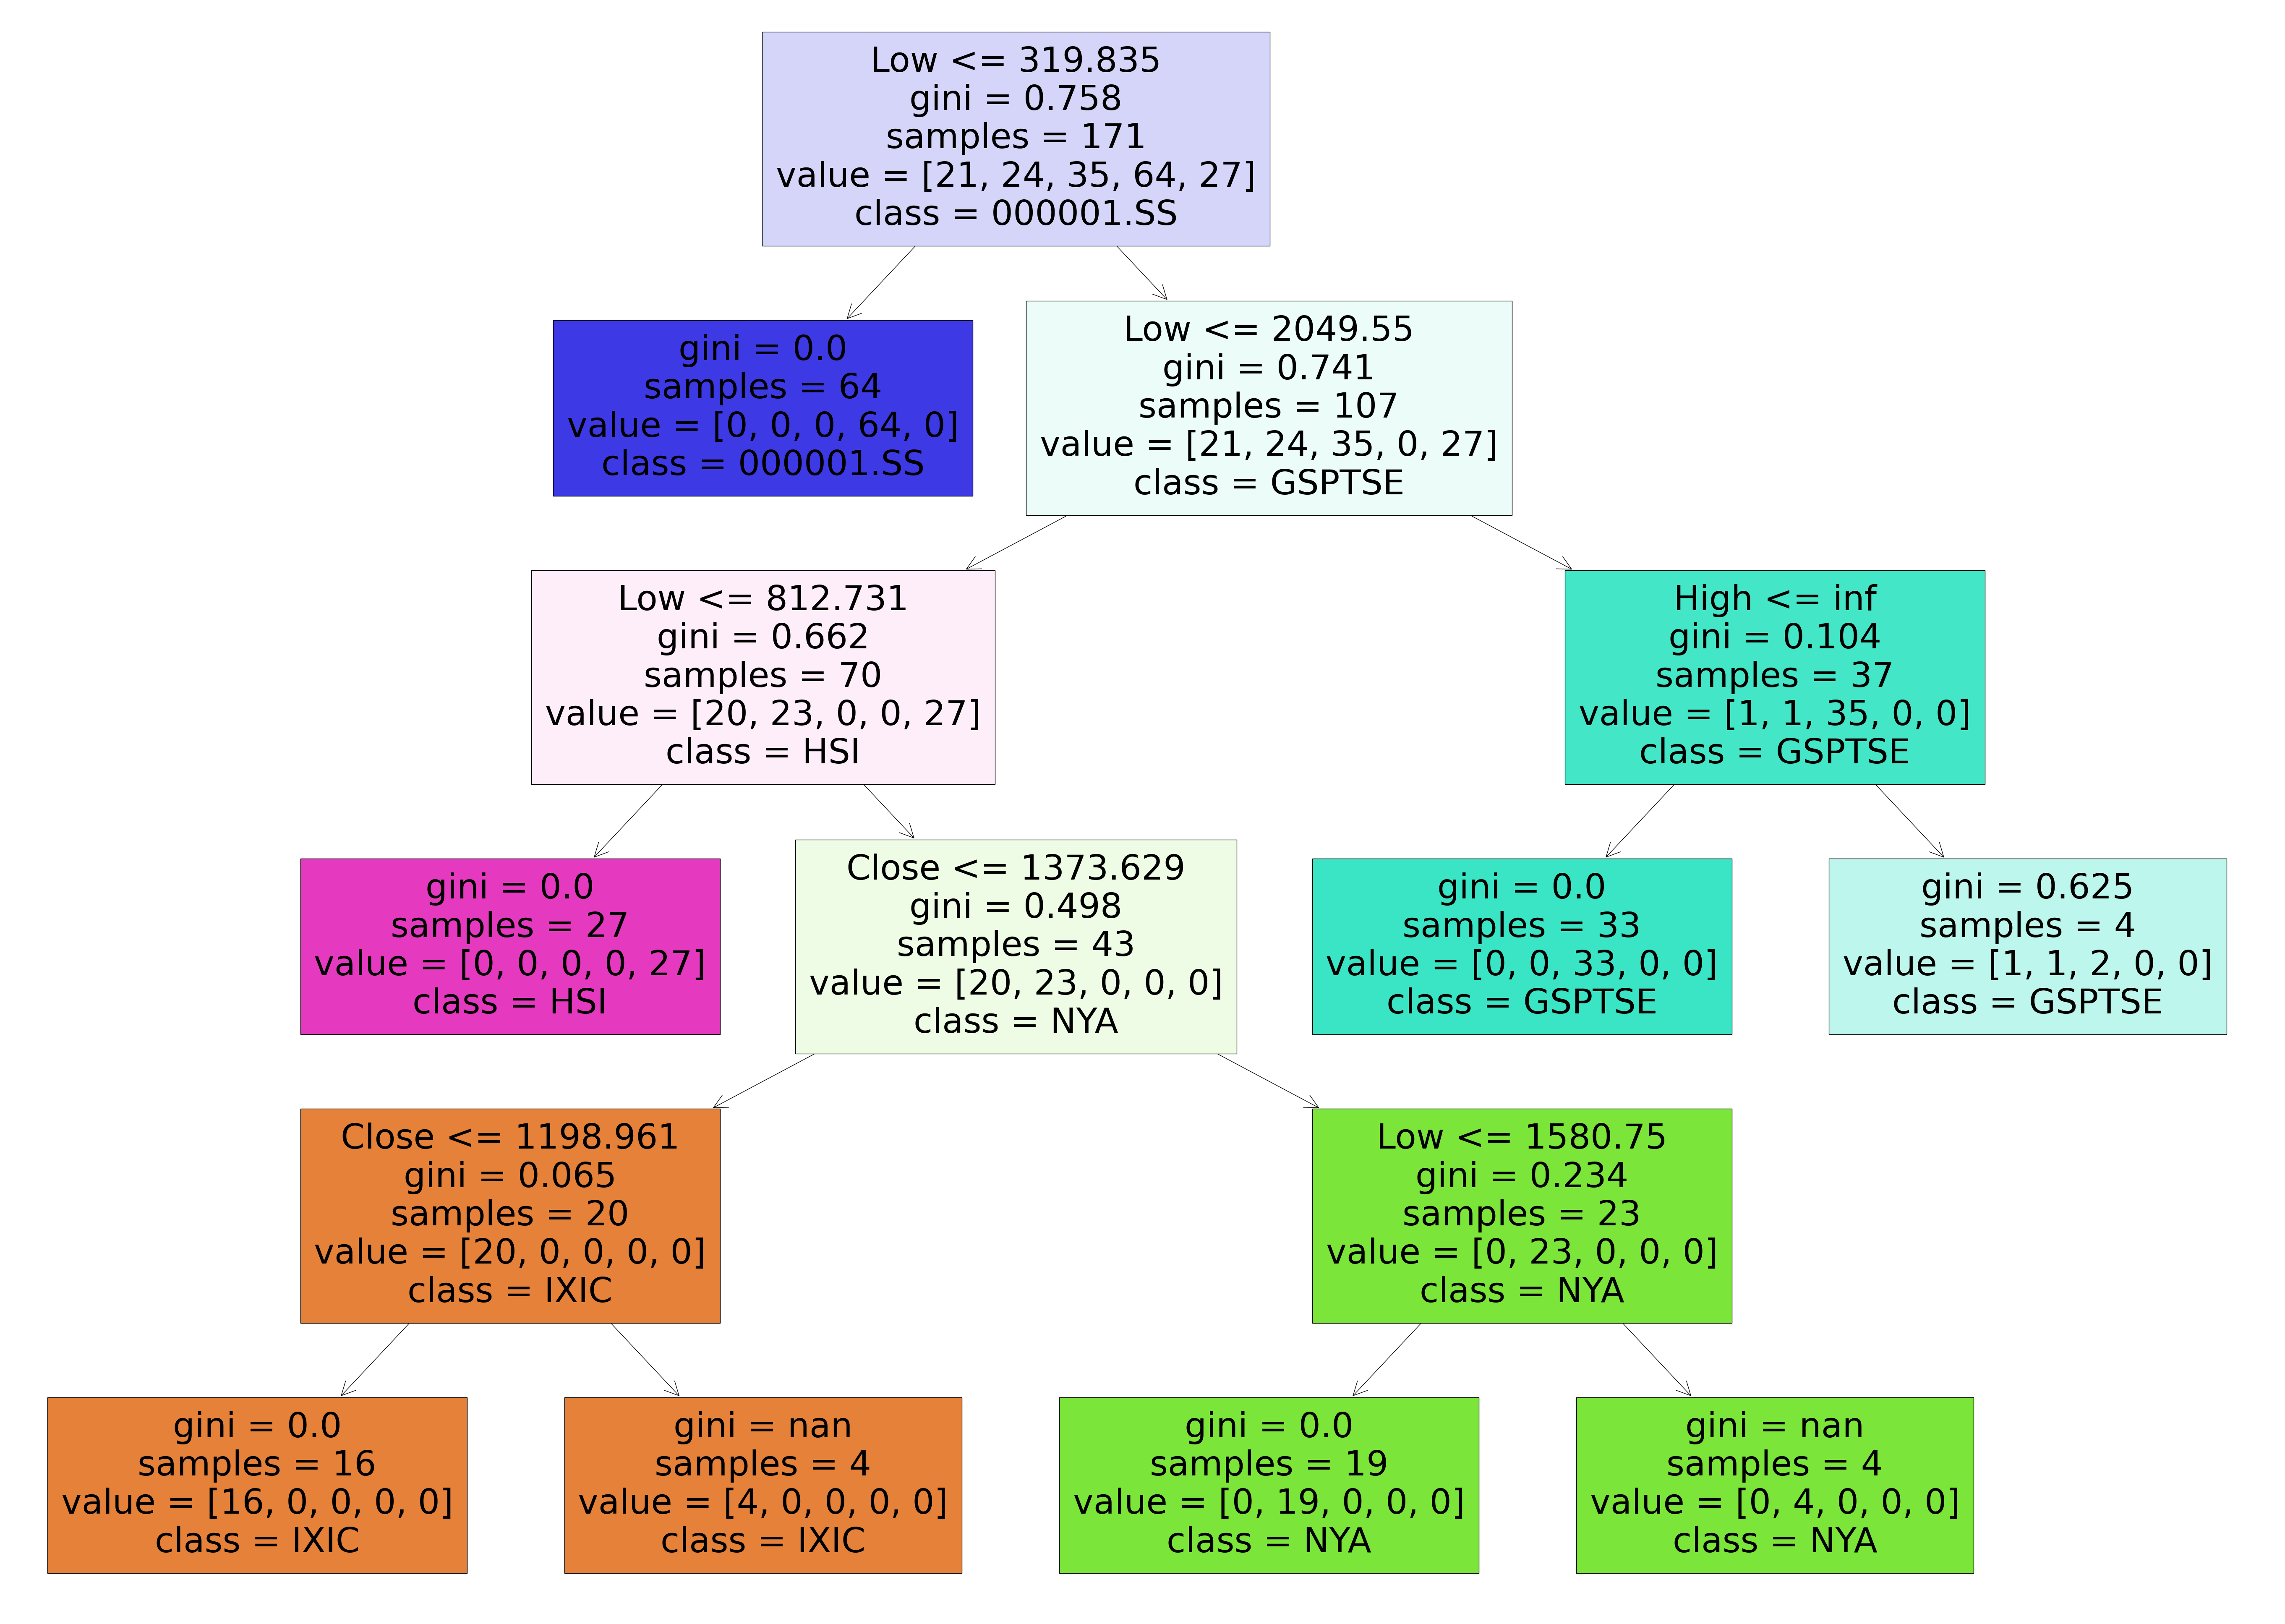

In [110]:
# If you have created the Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt

print(house_feature_names)
print(house_target_names)

fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_model, 
                   feature_names=house_feature_names,  
                   class_names=house_target_names,
                   filled=True)

## Clustering with K-Means

In [111]:
# Import datasets library
from sklearn import datasets
iris_file = pd.read_csv('./datasets/market.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[2:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

# Preliminary data exploration
print(house_data.shape)     # Output: (150, 4)
print(house_feature_names)  # Output: ['sepal length (cm)', ...]
print(house_data[:7])

# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(house_data)
print(scaled_iris[:7])

(256, 6)
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
         Open        High         Low       Close   Adj Close  Volume
0  528.690002  528.690002  528.690002  528.690002  528.690002     0.0
1  527.210022  527.210022  527.210022  527.210022  527.210022     0.0
2  527.840027  527.840027  527.840027  527.840027  527.840027     0.0
3  531.119995  531.119995  531.119995  531.119995  531.119995     0.0
4  532.070007  532.070007  532.070007  532.070007  532.070007     0.0
5  532.599976  532.599976  532.599976  532.599976  532.599976     0.0
6  533.869995  533.869995  533.869995  533.869995  533.869995     0.0
[[-0.49388898 -0.4957667  -0.49085246 -0.49338567 -0.49304616  0.        ]
 [-0.49539253 -0.49726951 -0.49235719 -0.49488946 -0.49455035  0.        ]
 [-0.49475249 -0.49662979 -0.49171665 -0.49424932 -0.49391004  0.        ]
 [-0.49142028 -0.49329921 -0.48838183 -0.49091658 -0.49057642  0.        ]
 [-0.49045513 -0.49233453 -0.48741593 -0.48995129 -0.48961088  0.        ]


### Finding the Optimal Number of Clusters with the Elbow Method

C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

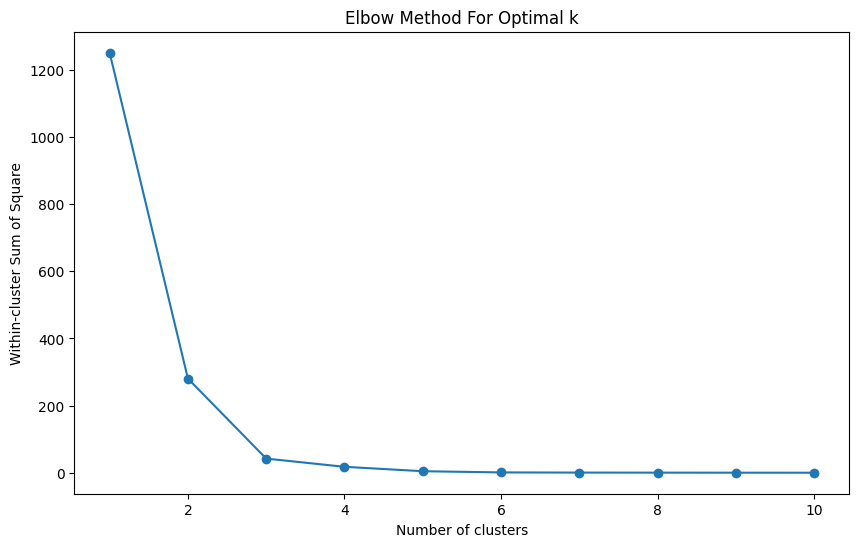

In [112]:
# Calculate the within-cluster sum of square across different cluster counts
from sklearn.impute import SimpleImputer

market_data_no_missing = house_data.dropna()
scaled_market_data_no_missing = scaler.fit_transform(market_data_no_missing)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_market_data_no_missing)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

### Clustering and evaluating

In [113]:
# Assuming the elbow is at three clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_market_data_no_missing)

# Evaluate and adjust clusters
adj_clusters = [(x + 2) % 3 for x in clusters]

# Ensure the target values align with the processed data
house_target_no_missing = house_target.loc[market_data_no_missing.index]
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
house_target_numeric = label_encoder.fit_transform(house_target_no_missing)

# Print confusion matrix and classification report
print(confusion_matrix(house_target_numeric, adj_clusters))
print(classification_report(house_target_numeric, adj_clusters))

C:\Users\Pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Mix of label input types (string and number)